In [41]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Carregando o dataset

In [42]:
dataset = keras.datasets.fashion_mnist

In [43]:
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

### Exploração de dados

In [44]:
len(imagens_treino)

60000

In [45]:
imagens_treino.shape

(60000, 28, 28)

In [46]:
len(identificacoes_teste)

10000

In [47]:
imagens_teste.shape

(10000, 28, 28)

In [48]:
identificacoes_treino.max()

9

In [49]:
identificacoes_treino.min()

0

### Exibição dos dados

In [50]:
total_de_classificadores = 10
nomes_de_classificadores = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

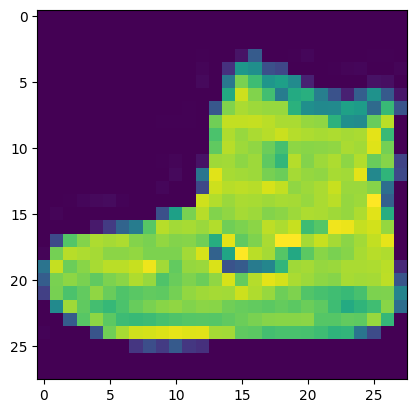

In [51]:
plt.imshow(imagens_treino[0])
plt.show()

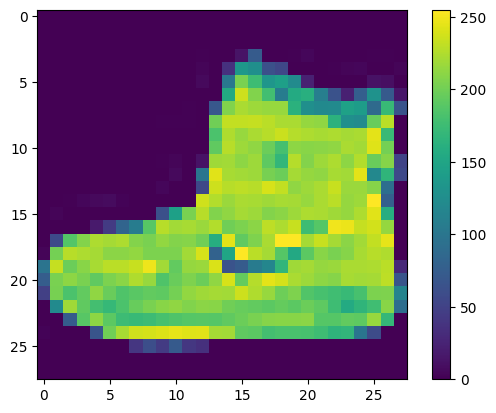

In [52]:
plt.imshow(imagens_treino[0])
plt.colorbar()

### Normalizando as imagens

In [53]:
imagens_treino = imagens_treino/float(255)

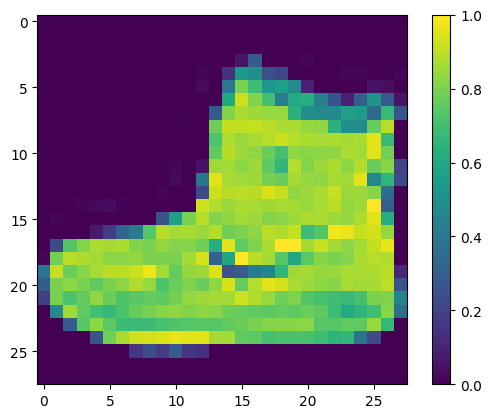

In [54]:
plt.imshow(imagens_treino[0])
plt.colorbar()

### Criando, Compilando, Treinando e Normalizando o modelo

In [55]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [56]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5294 - accuracy: 0.8101 - val_loss: 0.4159 - val_accuracy: 0.8487
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3977 - accuracy: 0.8544 - val_loss: 0.3682 - val_accuracy: 0.8668
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8657 - val_loss: 0.3465 - val_accuracy: 0.8752
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3382 - accuracy: 0.8752 - val_loss: 0.3369 - val_accuracy: 0.8788
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3232 - accuracy: 0.8804 - val_loss: 0.3326 - val_accuracy: 0.8803


### Salvando e carregando o modelo treinado

In [57]:
from tensorflow.keras.models import load_model

modelo.save("modelo.h5")
modelo_salvo = load_model("modelo.h5")

### Visualizando as acurácias de treino e validação por épocas

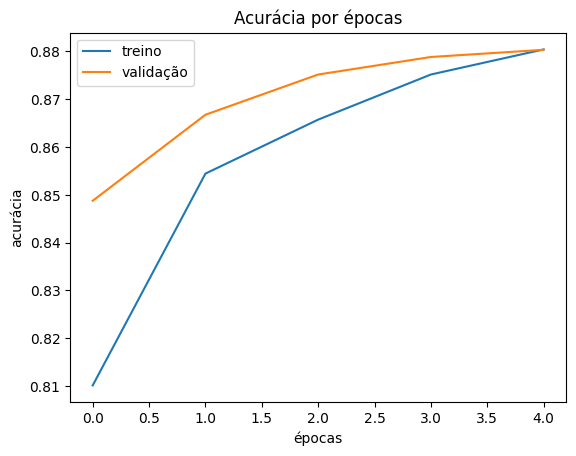

In [58]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


### Visualizando as perdas de treino e validação por época

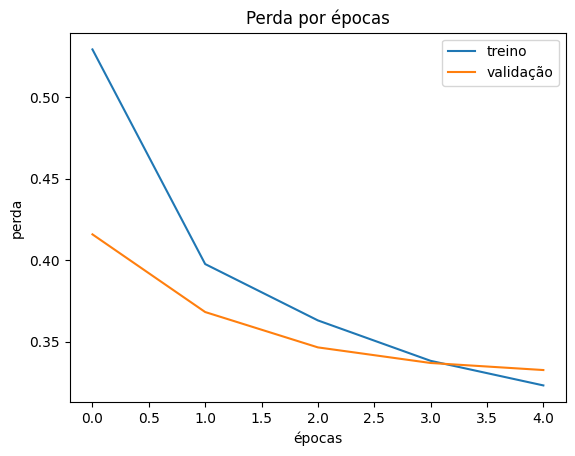

In [59]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

### Testando o modelo e o modelo salvo

In [62]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 4ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


### Avaliando o modelo

In [63]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 2s 6ms/step - loss: 56.2691 - accuracy: 0.8563
Perda do teste: 56.26914978027344
Acurácia do teste: 0.8562999963760376
